In [1]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

In [2]:
#reading csv file
kickstarters = pd.read_csv(r"C:/Users/Prabhjyot Kaur/Downloads/Kaggle/ks-projects-201801.csv")

In [3]:
kickstarters.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Scaling

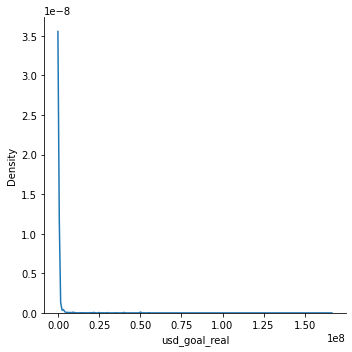

In [5]:
sns.displot(kickstarters, x="usd_goal_real",kind="kde")

In [ ]:
#Scaling the goals of each campaign

In [12]:
#select the usd_goal_real column
original_data = pd.DataFrame(kickstarters["usd_goal_real"])

#scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data,columns=["usd_goal_real"])

print('Original Data Preview:\n\n', original_data.head())
print('Minimum Value:', float(original_data.min()),'\nMaximum Vlue:', float(original_data.max()))

print('_'*30)

print('\nScaled Data Preview:\n\n', scaled_data.head())
print('Minimum Value:', float(scaled_data.min()),'\nMaximum Value:', float(scaled_data.max()))

Original Data Preview:

    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum Value: 0.01 
Maximum Vlue: 166361390.71
______________________________

Scaled Data Preview:

    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum Value: 0.0 
Maximum Value: 1.0


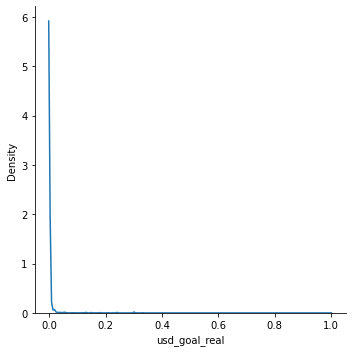

In [14]:
sns.displot(scaled_data, x="usd_goal_real",kind="kde")

In [15]:
#scaling goal column

In [17]:
# select the goal column
original_goal_data = pd.DataFrame(kickstarters["goal"])

#scaling
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

print('Original data Preview:\n\n', original_goal_data.head())
print('Minimum value:', float(original_goal_data.min()),'\nMaximum value:', float(original_goal_data.max()))

print('_'*30)

print('\nScaled data Preview:\n\n', scaled_goal_data.head())
print('Minimum value:', float(scaled_goal_data.min()),'\nMaximum value:', float(scaled_goal_data.max()))

Original data Preview:

       goal
0   1000.0
1  30000.0
2  45000.0
3   5000.0
4  19500.0
Minimum value: 0.01 
Maximum value: 100000000.0
______________________________

Scaled data Preview:

        goal
0  0.000010
1  0.000300
2  0.000450
3  0.000050
4  0.000195
Minimum value: 0.0 
Maximum value: 1.0


### Normalization

In [18]:
#normalizing the amount of money pledged to each campaign

In [24]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters["usd_pledged_real"]>0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters["usd_pledged_real"].loc[index_of_positive_pledges]

# normalize the pledges (with Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], name = "usd_pledged_real", index = positive_pledges.index)

print('Original Data Preview:\n\n', positive_pledges.head())
print('\nMinimum Value:', float(positive_pledges.min()),'\nMaximum Value:', float(positive_pledges.max()))

print('_'*30)

print('\nNormalized Data Preview:\n\n', normalized_pledges.head())
print('\nMinimum Value:',float(normalized_pledges.min()),'\nMaximum Value:', float(normalized_pledges.max()))

Original Data Preview:

 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64

Minimum Value: 0.45 
Maximum Value: 20338986.27
______________________________

Normalized Data Preview:

 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64

Minimum Value: -0.7779954122762203 
Maximum Value: 30.69054020451361


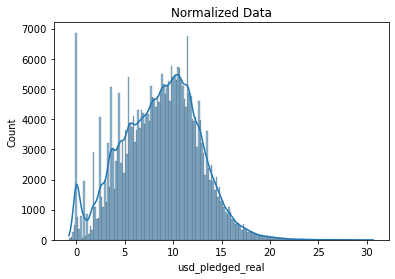

In [27]:
# plotting normalized data
normalized_plot = sns.histplot(normalized_pledges, kde=True)
normalized_plot.set_title("Normalized Data")
plt.show()

In [28]:
#nomalizing pledged column

In [31]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_positive_pledges = kickstarters.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges_only = kickstarters.pledged.loc[index_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_values = pd.Series(stats.boxcox(positive_pledges_only)[0], name='pledged', index=positive_pledges_only.index)

Text(0.5, 1.0, 'Normalized Data')

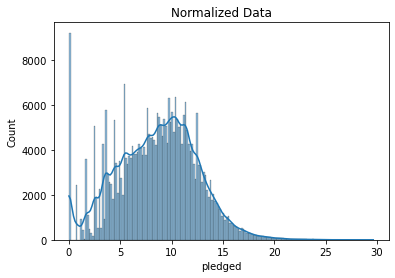

In [33]:
# plot normalized data
pleged_plot = sns.histplot(normalized_values, kde=True)
pleged_plot.set_title("Normalized Data")